In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as ts
import tensorflow.keras as keras
from keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Flatten,Conv2D, MaxPooling2D, BatchNormalization
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 13s 3us/step


In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [7]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
     

In [8]:

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [9]:

model = keras.Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
plot_model(model, to_file='fmnistcnn.png',show_shapes=True, show_layer_names=True)
     

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [11]:
history = model.fit(X_train, y_train, epochs=15, batch_size=32)

Epoch 1/15
1875/1875 [==============================] - 245s 21ms/step - loss: 0.3829 - accuracy: 0.8632
Epoch 2/15
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2573 - accuracy: 0.9058
Epoch 3/15
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2114 - accuracy: 0.9217
Epoch 4/15
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1820 - accuracy: 0.9321
Epoch 5/15
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1531 - accuracy: 0.9438
Epoch 6/15
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1330 - accuracy: 0.9489
Epoch 7/15
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1132 - accuracy: 0.9573
Epoch 8/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1006 - accuracy: 0.9631
Epoch 9/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0841 - accuracy: 0.9691
Epoch 10/15
1875/1875 [==============================] - 24s 13

In [12]:
train_loss, train_acc = model.evaluate(X_train, y_train)
test_loss, test_acc = model.evaluate(X_test, y_test)

print("Train accuracy:", round(train_acc, 5))
print("Train loss:", round(train_loss, ))

print("Test accuracy:", round(test_acc, 5))
print("Test loss:", round(test_loss, 3))

313/313 [==============================] - 4s 10ms/step - loss: 0.4428 - accuracy: 0.9084
Train accuracy: 0.98855
Train loss: 0
Test accuracy: 0.9084
Test loss: 0.443


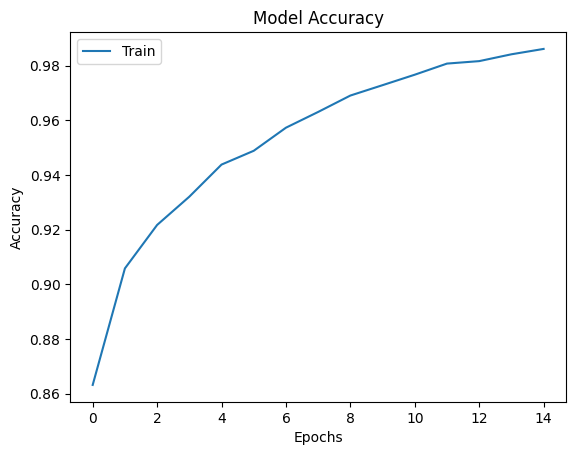

In [13]:
plt.plot(history.history["accuracy"])
#plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()